In [1]:
!pip install pyspark


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\thera\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pyspark

In [3]:
import pandas as pd

In [5]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName('finalproject').getOrCreate()


In [4]:
# GCS bucket path where your file is located
gcs_bucket_path = "gs://bucket_dsa/2019.csv"

# Read the CSV file from GCS into a Spark DataFrame
df= spark.read.csv(gcs_bucket_path, header=True, inferSchema=True)

# Show the DataFrame schema and sample data
df.printSchema()
df.show(5)

In [7]:
df.head()

Row(FL_DATE=datetime.date(2018, 1, 1), OP_CARRIER='UA', OP_CARRIER_FL_NUM=2429, ORIGIN='EWR', DEST='DEN', CRS_DEP_TIME=1517, DEP_TIME=1512.0, DEP_DELAY=-5.0, TAXI_OUT=15.0, WHEELS_OFF=1527.0, WHEELS_ON=1712.0, TAXI_IN=10.0, CRS_ARR_TIME=1745, ARR_TIME=1722.0, ARR_DELAY=-23.0, CANCELLED=0.0, CANCELLATION_CODE=None, DIVERTED=0.0, CRS_ELAPSED_TIME=268.0, ACTUAL_ELAPSED_TIME=250.0, AIR_TIME=225.0, DISTANCE=1605.0, CARRIER_DELAY=None, WEATHER_DELAY=None, NAS_DELAY=None, SECURITY_DELAY=None, LATE_AIRCRAFT_DELAY=None, Unnamed: 27=None)

In [8]:
df.show(0)

+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
+-------+-

In [9]:
df.dtypes

[('FL_DATE', 'date'),
 ('OP_CARRIER', 'string'),
 ('OP_CARRIER_FL_NUM', 'int'),
 ('ORIGIN', 'string'),
 ('DEST', 'string'),
 ('CRS_DEP_TIME', 'int'),
 ('DEP_TIME', 'double'),
 ('DEP_DELAY', 'double'),
 ('TAXI_OUT', 'double'),
 ('WHEELS_OFF', 'double'),
 ('WHEELS_ON', 'double'),
 ('TAXI_IN', 'double'),
 ('CRS_ARR_TIME', 'int'),
 ('ARR_TIME', 'double'),
 ('ARR_DELAY', 'double'),
 ('CANCELLED', 'double'),
 ('CANCELLATION_CODE', 'string'),
 ('DIVERTED', 'double'),
 ('CRS_ELAPSED_TIME', 'double'),
 ('ACTUAL_ELAPSED_TIME', 'double'),
 ('AIR_TIME', 'double'),
 ('DISTANCE', 'double'),
 ('CARRIER_DELAY', 'double'),
 ('WEATHER_DELAY', 'double'),
 ('NAS_DELAY', 'double'),
 ('SECURITY_DELAY', 'double'),
 ('LATE_AIRCRAFT_DELAY', 'double'),
 ('Unnamed: 27', 'string')]

In [10]:
df.describe().show()

+-------+----------+------------------+-------+-------+------------------+------------------+-----------------+------------------+------------------+----------------+------------------+-----------------+-----------------+-----------------+-------------------+-----------------+--------------------+------------------+-------------------+------------------+-----------------+-----------------+------------------+------------------+-------------------+-------------------+-----------+
|summary|OP_CARRIER| OP_CARRIER_FL_NUM| ORIGIN|   DEST|      CRS_DEP_TIME|          DEP_TIME|        DEP_DELAY|          TAXI_OUT|        WHEELS_OFF|       WHEELS_ON|           TAXI_IN|     CRS_ARR_TIME|         ARR_TIME|        ARR_DELAY|          CANCELLED|CANCELLATION_CODE|            DIVERTED|  CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|          AIR_TIME|         DISTANCE|    CARRIER_DELAY|     WEATHER_DELAY|         NAS_DELAY|     SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------+----------+--------------

In [11]:
# #handling missing values
# df.na.drop(how="all")

In [12]:
data_test = df.head(5)
data_test

[Row(FL_DATE=datetime.date(2018, 1, 1), OP_CARRIER='UA', OP_CARRIER_FL_NUM=2429, ORIGIN='EWR', DEST='DEN', CRS_DEP_TIME=1517, DEP_TIME=1512.0, DEP_DELAY=-5.0, TAXI_OUT=15.0, WHEELS_OFF=1527.0, WHEELS_ON=1712.0, TAXI_IN=10.0, CRS_ARR_TIME=1745, ARR_TIME=1722.0, ARR_DELAY=-23.0, CANCELLED=0.0, CANCELLATION_CODE=None, DIVERTED=0.0, CRS_ELAPSED_TIME=268.0, ACTUAL_ELAPSED_TIME=250.0, AIR_TIME=225.0, DISTANCE=1605.0, CARRIER_DELAY=None, WEATHER_DELAY=None, NAS_DELAY=None, SECURITY_DELAY=None, LATE_AIRCRAFT_DELAY=None, Unnamed: 27=None),
 Row(FL_DATE=datetime.date(2018, 1, 1), OP_CARRIER='UA', OP_CARRIER_FL_NUM=2427, ORIGIN='LAS', DEST='SFO', CRS_DEP_TIME=1115, DEP_TIME=1107.0, DEP_DELAY=-8.0, TAXI_OUT=11.0, WHEELS_OFF=1118.0, WHEELS_ON=1223.0, TAXI_IN=7.0, CRS_ARR_TIME=1254, ARR_TIME=1230.0, ARR_DELAY=-24.0, CANCELLED=0.0, CANCELLATION_CODE=None, DIVERTED=0.0, CRS_ELAPSED_TIME=99.0, ACTUAL_ELAPSED_TIME=83.0, AIR_TIME=65.0, DISTANCE=414.0, CARRIER_DELAY=None, WEATHER_DELAY=None, NAS_DELAY=Non

In [13]:
#carrier names
df_cn = spark.read.csv('D:\\Project for info encoding\\dsadataset2\\L_UNIQUE_CARRIERS.csv', header=True, inferSchema=True)

In [14]:
df_cn

DataFrame[Code: string, Description: string]

In [15]:
df_cn.head(5)

[Row(Code='02Q', Description='Titan Airways'),
 Row(Code='04Q', Description='Tradewind Aviation'),
 Row(Code='05Q', Description='Comlux Aviation, AG'),
 Row(Code='06Q', Description='Master Top Linhas Aereas Ltd.'),
 Row(Code='07Q', Description='Flair Airlines Ltd.')]

In [28]:
# Renaming a column in one of the DataFrames to match the column in the other DataFrame
df_cn = df_cn.withColumnRenamed('Description','CARRIER')

In [16]:
# Renaming a column in one of the DataFrames to match the column in the other DataFrame
df_cn = df_cn.withColumnRenamed('CODE','OP_CARRIER')

In [29]:
df_cn

DataFrame[OP_CARRIER: string, CARRIER: string]

In [30]:
# Joining PySpark DataFrames with the correct order
df_final = df.join(df_cn, on='OP_CARRIER', how='left')

In [31]:
from pyspark.sql.functions import col


df_final = df_final.withColumn('FINAL_DELAY', col('DEP_DELAY') + col('ARR_DELAY'))


In [32]:
df_final.head(5)

[Row(OP_CARRIER='UA', FL_DATE=datetime.date(2018, 1, 1), OP_CARRIER_FL_NUM=2429, ORIGIN='EWR', DEST='DEN', CRS_DEP_TIME=1517, DEP_TIME=1512.0, DEP_DELAY=-5.0, TAXI_OUT=15.0, WHEELS_OFF=1527.0, WHEELS_ON=1712.0, TAXI_IN=10.0, CRS_ARR_TIME=1745, ARR_TIME=1722.0, ARR_DELAY=-23.0, CANCELLED=0.0, CANCELLATION_CODE=None, DIVERTED=0.0, CRS_ELAPSED_TIME=268.0, ACTUAL_ELAPSED_TIME=250.0, AIR_TIME=225.0, DISTANCE=1605.0, CARRIER_DELAY=None, WEATHER_DELAY=None, NAS_DELAY=None, SECURITY_DELAY=None, LATE_AIRCRAFT_DELAY=None, Unnamed: 27=None, CARRIER='United Air Lines Inc.', FINAL_DELAY=-28.0),
 Row(OP_CARRIER='UA', FL_DATE=datetime.date(2018, 1, 1), OP_CARRIER_FL_NUM=2427, ORIGIN='LAS', DEST='SFO', CRS_DEP_TIME=1115, DEP_TIME=1107.0, DEP_DELAY=-8.0, TAXI_OUT=11.0, WHEELS_OFF=1118.0, WHEELS_ON=1223.0, TAXI_IN=7.0, CRS_ARR_TIME=1254, ARR_TIME=1230.0, ARR_DELAY=-24.0, CANCELLED=0.0, CANCELLATION_CODE=None, DIVERTED=0.0, CRS_ELAPSED_TIME=99.0, ACTUAL_ELAPSED_TIME=83.0, AIR_TIME=65.0, DISTANCE=414.0, C

In [33]:
from pyspark.sql.functions import when, col



# Calculate the minimum and maximum values to define intervals dynamically
min_dep_time, max_dep_time = df_final.selectExpr('min(DEP_TIME)', 'max(DEP_TIME)').first()

# Define the number of intervals and interval size dynamically
num_intervals = 24  # Number of intervals
interval_size = (max_dep_time - min_dep_time) / num_intervals  # Calculate interval size

# Create when conditions to check the intervals and assign values to a new column 'HOUR'
exprs = None
for i in range(num_intervals):
    condition = (col('DEP_TIME') >= min_dep_time + i * interval_size) & (col('DEP_TIME') < min_dep_time + (i + 1) * interval_size)
    exprs = when(condition, i).otherwise(exprs)

# Assign the expression to a new column 'HOUR'
df_final = df_final.withColumn('HOUR', exprs)

# Display or perform further operations on df_final
df_final.show()


+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+--------------------+-----------+----+
|OP_CARRIER|   FL_DATE|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|             CARRIER|FINAL_DELAY|HOUR|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-----------

In [35]:
from functools import reduce
from pyspark.sql import functions as F
from pyspark.sql.functions import col, when

# Calculate the minimum and maximum values to define intervals dynamically
min_distance, max_distance = df_final.selectExpr('min(DISTANCE)', 'max(DISTANCE)').first()

# Define the number of intervals and interval size dynamically
num_intervals_distance = 26  # Number of intervals
interval_size_distance = (max_distance - min_distance) / num_intervals_distance  # Calculate interval size

# Create conditions for each interval using PySpark's when function
conditions_distance = [
    (col('DISTANCE') >= min_distance + i * interval_size_distance) &
    (col('DISTANCE') < min_distance + (i + 1) * interval_size_distance)
    for i in range(num_intervals_distance)
]

# Create labels for each interval
labels = [min_distance + i * interval_size_distance for i in range(num_intervals_distance)]

# Initialize the first condition with its label
condition_accumulated = when(conditions_distance[0], labels[0])

# Use reduce to accumulate conditions with corresponding labels
condition_accumulated = reduce(
    lambda acc, condition_label: acc.when(condition_label[0], condition_label[1]),
    zip(conditions_distance[1:], labels[1:]),
    condition_accumulated
)

# Apply conditions to create the 'DISTANCE_INTERVALS' column
df_final = df_final.withColumn('DISTANCE_INTERVALS', condition_accumulated.otherwise(None))


In [36]:
from pyspark.sql.functions import col

df_final = df_final.withColumn('GAIN', col('DEP_DELAY') - col('ARR_DELAY'))


In [ ]:
from pyspark.sql import functions as F


av_delay = df_final.groupBy('CARRIER').agg(F.mean('FINAL_DELAY').alias('Average delay'))
av_delay.show()


In [37]:
from pyspark.sql import functions as F


av_delay = df_final.groupBy('CARRIER').agg(F.mean('FINAL_DELAY').alias('Average delay'))
av_delay.show()


+--------------------+------------------+
|             CARRIER|     Average delay|
+--------------------+------------------+
|   Endeavor Air Inc.|15.410124452688565|
|       Allegiant Air| 22.88575720648794|
|ExpressJet Airlin...|21.052695299186603|
|SkyWest Airlines ...|17.034774105016325|
|      Virgin America| 8.050545094152627|
|   PSA Airlines Inc.|20.189729253830176|
|United Air Lines ...|15.740406397632192|
|    Republic Airline|10.353304810451693|
|Frontier Airlines...| 33.83638947269896|
|Southwest Airline...|15.625604062453768|
|     JetBlue Airways|27.196649628221575|
|           Envoy Air|13.005427122254364|
|Hawaiian Airlines...|1.7252293853073464|
|Alaska Airlines Inc.|1.9265492079562432|
|Delta Air Lines Inc.| 7.117006432254722|
|  Mesa Airlines Inc.|20.010019417104267|
|American Airlines...|15.426686469666835|
|    Spirit Air Lines|15.010762136117476|
+--------------------+------------------+



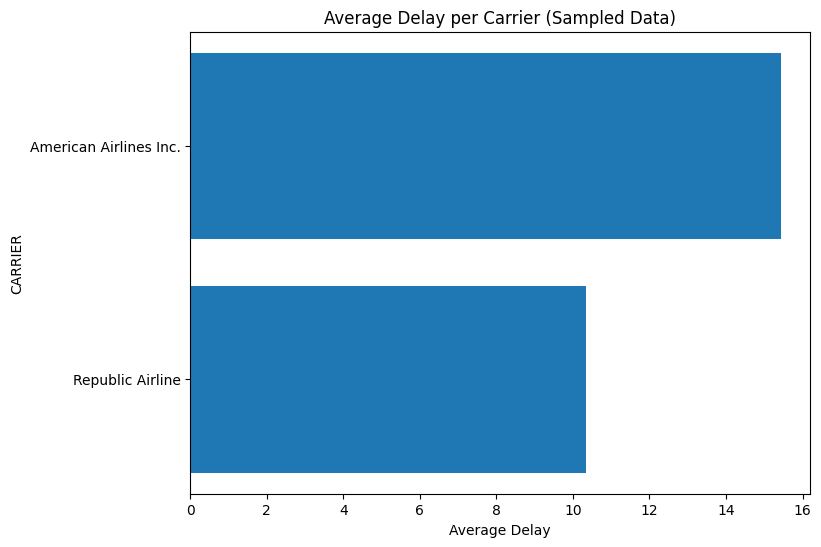

In [42]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Sample a portion of the DataFrame
sample_df = av_delay.sample(fraction=0.1, seed=42)  # Adjust the fraction as needed

# Convert the sampled data to Pandas for plotting
sample_pd = sample_df.toPandas()

plt.figure(figsize=(8, 6))
plt.barh(sample_pd['CARRIER'], sample_pd['Average delay'])
plt.xlabel('Average Delay')
plt.ylabel('CARRIER')
plt.title('Average Delay per Carrier (Sampled Data)')
plt.show()


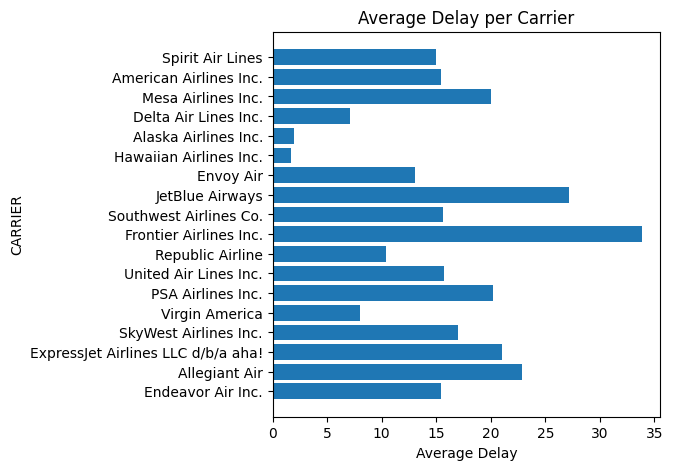

In [43]:
import matplotlib.pyplot as plt



# Collect the aggregated data to the local machine for plotting
av_delay_local = av_delay.toPandas()  # Collecting data to local Pandas DataFrame

plt.figure(figsize=(5, 5))
plt.barh(av_delay_local['CARRIER'], av_delay_local['Average delay'])
plt.xlabel('Average Delay')
plt.ylabel('CARRIER')
plt.title('Average Delay per Carrier')
plt.show()


In [39]:
from pyspark.sql import functions as F



# Filter for flights from ABQ to ORD
filtered_flights = df_final.filter((df_final['ORIGIN'] == 'ABQ') & (df_final['DEST'] == 'ORD'))

# Calculate the average delay for each carrier on that route
avg_delay_per_carrier = (
    filtered_flights
    .groupBy('ORIGIN', 'DEST', 'Carrier')
    .agg(F.mean('FINAL_DELAY').alias('Average Delay'))
    .orderBy('Carrier')  # Optional: Order results by Carrier
)

# Show the results
avg_delay_per_carrier.show()


+------+----+--------------------+-----------------+
|ORIGIN|DEST|             Carrier|    Average Delay|
+------+----+--------------------+-----------------+
|   ABQ| ORD|American Airlines...|2.815985130111524|
|   ABQ| ORD|           Envoy Air|        2.1328125|
|   ABQ| ORD|    Republic Airline|3.418181818181818|
|   ABQ| ORD|SkyWest Airlines ...|12.28888888888889|
|   ABQ| ORD|United Air Lines ...|38.82835820895522|
+------+----+--------------------+-----------------+



In [49]:
from pyspark.sql import functions as F


cols = ['ORIGIN', 'DEST', 'Carrier', 'FINAL_DELAY']
air_orig_dest = data.select(cols)

# Set origin and destination and filter
orig = 'ABQ'
dest = 'ORD'
my_orig_dest = air_orig_dest.filter((F.col('ORIGIN') == orig) & (F.col('DEST') == dest))

# Compute the average delay on flights from ABQ to ORD
my_orig_dest = my_orig_dest.groupBy('ORIGIN', 'DEST', 'Carrier').agg(F.mean('FINAL_DELAY').alias('AVG_DELAY'))

# Printing results
my_orig_dest.show()


+------+----+--------------------+-----------------+
|ORIGIN|DEST|             Carrier|        AVG_DELAY|
+------+----+--------------------+-----------------+
|   ABQ| ORD|           Envoy Air|        2.1328125|
|   ABQ| ORD|American Airlines...|2.815985130111524|
|   ABQ| ORD|    Republic Airline|3.418181818181818|
|   ABQ| ORD|SkyWest Airlines ...|12.28888888888889|
|   ABQ| ORD|United Air Lines ...|38.82835820895522|
+------+----+--------------------+-----------------+



In [50]:
from pyspark.sql import functions as F

# Set intervals
limits = [0, 600, 1200, 1800, 2400]
names = ['early morning', 'morning', 'afternoon', 'night']
data = df_final.withColumn('INTERVAL', F.when(
    (F.col('DEP_TIME') >= limits[0]) & (F.col('DEP_TIME') < limits[1]), names[0]
).when(
    (F.col('DEP_TIME') >= limits[1]) & (F.col('DEP_TIME') < limits[2]), names[1]
).when(
    (F.col('DEP_TIME') >= limits[2]) & (F.col('DEP_TIME') < limits[3]), names[2]
).otherwise(names[3]))

# Get only interesting columns
cols = ['ORIGIN', 'DEST', 'Carrier', 'FINAL_DELAY', 'DEP_TIME', 'INTERVAL']
my_orig_dest = data.select(*cols)

# Set origin and destination and filter
my_orig_dest = my_orig_dest.filter((F.col('ORIGIN') == orig) & (F.col('DEST') == dest))

# Group by ORIGIN, DEST, Carrier, INTERVAL, and calculate mean of FINAL_DELAY
by_interval = my_orig_dest.groupBy('ORIGIN', 'DEST', 'Carrier', 'INTERVAL').agg(F.mean('FINAL_DELAY').alias('MEAN_DELAY'))
by_interval.show()


+------+----+--------------------+---------+------------------+
|ORIGIN|DEST|             Carrier| INTERVAL|        MEAN_DELAY|
+------+----+--------------------+---------+------------------+
|   ABQ| ORD|           Envoy Air|    night|              NULL|
|   ABQ| ORD|American Airlines...|    night|              NULL|
|   ABQ| ORD|           Envoy Air|afternoon|         2.1328125|
|   ABQ| ORD|    Republic Airline|  morning|-4.953271028037383|
|   ABQ| ORD|American Airlines...|  morning|           -7.8125|
|   ABQ| ORD|SkyWest Airlines ...|afternoon|11.326923076923077|
|   ABQ| ORD|American Airlines...|afternoon|20.495049504950494|
|   ABQ| ORD|    Republic Airline|afternoon|             302.0|
|   ABQ| ORD|SkyWest Airlines ...|  morning|13.605263157894736|
|   ABQ| ORD|United Air Lines ...|afternoon|34.601694915254235|
|   ABQ| ORD|United Air Lines ...|    night|             529.5|
|   ABQ| ORD|United Air Lines ...|  morning| 4.357142857142857|
|   ABQ| ORD|    Republic Airline|    ni

In [55]:
from pyspark.sql import functions as F

# Set intervals
limits = [0, 600, 1200, 1800, 2400]
names = ['early morning', 'morning', 'afternoon', 'night']
data = df_final.withColumn('INTERVAL', F.when(
    (F.col('DEP_TIME') >= limits[0]) & (F.col('DEP_TIME') < limits[1]), names[0]
).when(
    (F.col('DEP_TIME') >= limits[1]) & (F.col('DEP_TIME') < limits[2]), names[1]
).when(
    (F.col('DEP_TIME') >= limits[2]) & (F.col('DEP_TIME') < limits[3]), names[2]
).otherwise(names[3]))

# Set delayed
delay_limits = [-2400, -30, 30, 2400]
delay_names = ['early', 'on time', 'delayed']
data = data.withColumn('DEP_DELAY_CATEGORIES', F.when(
    (F.col('FINAL_DELAY') >= delay_limits[0]) & (F.col('FINAL_DELAY') < delay_limits[1]), delay_names[0]
).when(
    (F.col('FINAL_DELAY') >= delay_limits[1]) & (F.col('FINAL_DELAY') < delay_limits[2]), delay_names[1]
).when(
    (F.col('FINAL_DELAY') >= delay_limits[2]) & (F.col('FINAL_DELAY') < delay_limits[3]), delay_names[2]
).otherwise(None))

# Get only interesting columns
cols = ['ORIGIN', 'DEST', 'Carrier', 'FINAL_DELAY', 'DEP_TIME', 'INTERVAL', 'DEP_DELAY_CATEGORIES']
my_orig_dest = data.select(*cols)

# Set origin and destination and filter
orig = 'ABQ'
dest = 'ORD'
my_orig_dest = my_orig_dest.filter((F.col('ORIGIN') == orig) & (F.col('DEST') == dest))

# Group by Carrier, INTERVAL, and DEP_DELAY_CATEGORIES and aggregate counts
by_delays = my_orig_dest.groupBy('Carrier', 'INTERVAL', 'DEP_DELAY_CATEGORIES').agg(F.count('*').alias('COUNTER'))

# Pivot table
by_delays = by_delays.groupBy('Carrier', 'INTERVAL').pivot('DEP_DELAY_CATEGORIES', delay_names).sum('COUNTER')
by_delays.show()


+--------------------+---------+-----+-------+-------+
|             Carrier| INTERVAL|early|on time|delayed|
+--------------------+---------+-----+-------+-------+
|    Republic Airline|    night| NULL|   NULL|   NULL|
|United Air Lines ...|afternoon|    6|     78|     34|
|American Airlines...|    night| NULL|   NULL|   NULL|
|           Envoy Air|afternoon|   18|     92|     18|
|SkyWest Airlines ...|  morning|    1|     34|      3|
|    Republic Airline|afternoon| NULL|      2|      1|
|           Envoy Air|    night| NULL|   NULL|   NULL|
|American Airlines...|  morning|   32|    289|     15|
|    Republic Airline|  morning|   18|     79|     10|
|SkyWest Airlines ...|afternoon|    1|     42|      9|
|United Air Lines ...|    night|    1|   NULL|      1|
|American Airlines...|afternoon|   19|    132|     51|
|United Air Lines ...|  morning| NULL|     11|      3|
+--------------------+---------+-----+-------+-------+



<Axes: ylabel='Carrier'>

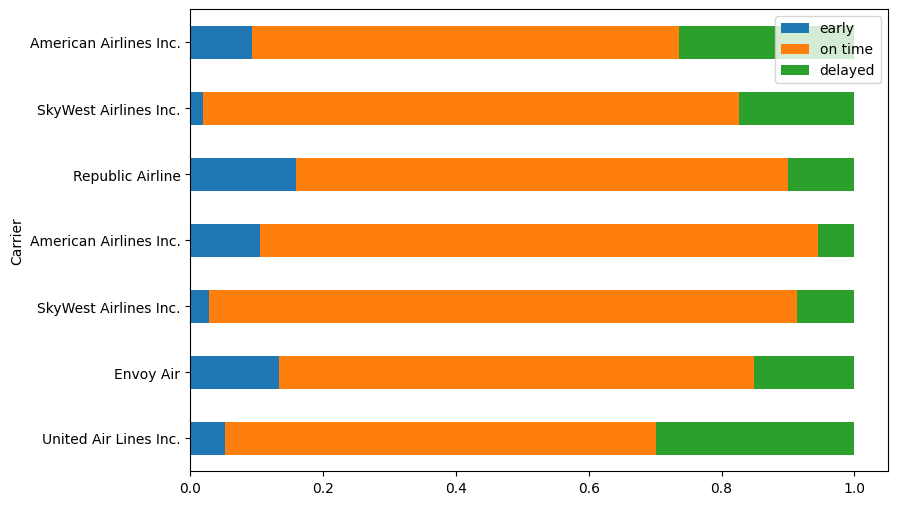

In [74]:
# Remove duplicates from the DataFrame
my_orig_dest = my_orig_dest.dropDuplicates()

# Group by Carrier, INTERVAL, and DEP_DELAY_CATEGORIES and aggregate counts
by_delays = my_orig_dest.groupBy('Carrier', 'INTERVAL', 'DEP_DELAY_CATEGORIES').agg(F.count('*').alias('COUNTER'))

# Pivot table
by_delays_pivot = by_delays.groupBy('Carrier', 'INTERVAL').pivot('DEP_DELAY_CATEGORIES').sum('COUNTER')

# Calculate total sum for each row
by_delays_pivot = by_delays_pivot.withColumn('total_sum', sum(col(name) for name in delay_names))

# Calculate normalized values
normed_ex = by_delays_pivot.select(
    'Carrier',
    *[(F.col(col) / F.col('total_sum')).alias(col) for col in delay_names if col != 'total_sum']
)

# Convert to Pandas DataFrame for plotting
normed_ex_pandas = normed_ex.toPandas()
normed_ex_pandas.dropna(inplace=True)
# Plotting the stacked horizontal bar plot
normed_ex_pandas.set_index('Carrier').plot(kind='barh', stacked=True, figsize=(9, 6))


<Figure size 900x600 with 0 Axes>

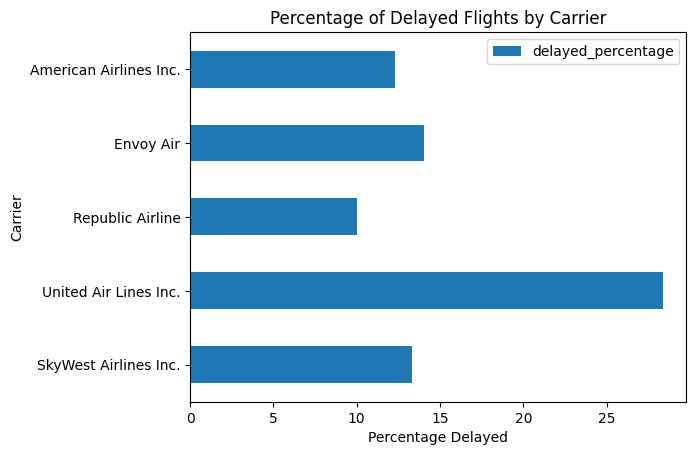

In [87]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt



# Set intervals for time categorization
limits = [0, 600, 1200, 1800, 2400]
names = ['early morning', 'morning', 'afternoon', 'night']

data = df_final.withColumn('INTERVAL', F.when(
    (F.col('DEP_TIME') >= limits[0]) & (F.col('DEP_TIME') < limits[1]), names[0]
).when(
    (F.col('DEP_TIME') >= limits[1]) & (F.col('DEP_TIME') < limits[2]), names[1]
).when(
    (F.col('DEP_TIME') >= limits[2]) & (F.col('DEP_TIME') < limits[3]), names[2]
).otherwise(names[3]))

# Set delayed categories
delay_limits = [-2400, -30, 30, 2400]
delay_names = ['early', 'on time', 'delayed']

data = data.withColumn('DEP_DELAY_CATEGORIES', F.when(
    (F.col('FINAL_DELAY') >= delay_limits[0]) & (F.col('FINAL_DELAY') < delay_limits[1]), delay_names[0]
).when(
    (F.col('FINAL_DELAY') >= delay_limits[1]) & (F.col('FINAL_DELAY') < delay_limits[2]), delay_names[1]
).when(
    (F.col('FINAL_DELAY') >= delay_limits[2]) & (F.col('FINAL_DELAY') < delay_limits[3]), delay_names[2]
))

# Filter for specific origin and destination
orig = 'ABQ'
dest = 'ORD'
ref_data = data.filter(
    (F.col('ORIGIN') == orig) &
    (F.col('DEST') == dest)
)

# Group by Carrier and DEP_DELAY_CATEGORIES, and aggregate count
ref_by_delays = ref_data.groupBy('Carrier', 'DEP_DELAY_CATEGORIES').agg(F.count('*').alias('COUNTER'))

# Pivot table with aggregated data
pivot_ref_by_delays = ref_by_delays.groupBy('Carrier').pivot('DEP_DELAY_CATEGORIES').sum('COUNTER').fillna(0)

# Calculate percentage of delayed flights
plot_percentage = pivot_ref_by_delays.withColumn('delayed_percentage',
    (F.col('delayed') / (F.col('early') + F.col('on time') + F.col('delayed')) * 100))

# Convert to Pandas DataFrame for plotting
plot_percentage_pd = plot_percentage.toPandas()

# Plotting using Matplotlib
plt.figure(figsize=(9, 6))
plot_percentage_pd.plot(kind='barh', x='Carrier', y='delayed_percentage', stacked=False)
plt.title("Percentage of Delayed Flights by Carrier")
plt.xlabel("Percentage Delayed")
plt.ylabel("Carrier")
plt.show()

<Figure size 1200x800 with 0 Axes>

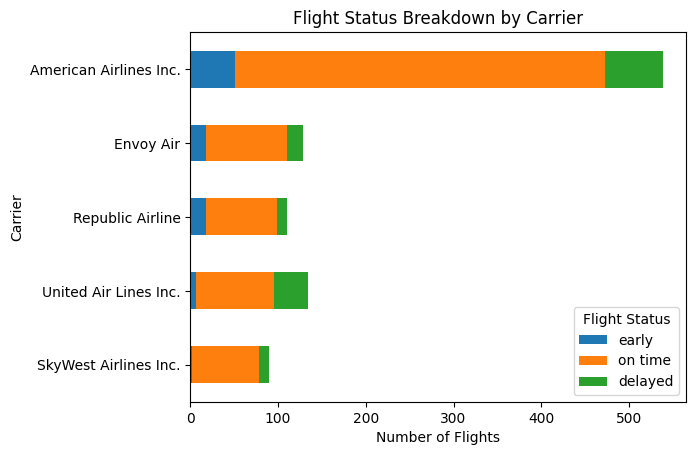

In [89]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Set intervals for time categorization
limits = [0, 600, 1200, 1800, 2400]
names = ['early morning', 'morning', 'afternoon', 'night']

data = df_final.withColumn('INTERVAL', F.when(
    (F.col('DEP_TIME') >= limits[0]) & (F.col('DEP_TIME') < limits[1]), names[0]
).when(
    (F.col('DEP_TIME') >= limits[1]) & (F.col('DEP_TIME') < limits[2]), names[1]
).when(
    (F.col('DEP_TIME') >= limits[2]) & (F.col('DEP_TIME') < limits[3]), names[2]
).otherwise(names[3]))

# Set delayed categories
delay_limits = [-2400, -30, 30, 2400]
delay_names = ['early', 'on time', 'delayed']

data = data.withColumn('DEP_DELAY_CATEGORIES', F.when(
    (F.col('FINAL_DELAY') >= delay_limits[0]) & (F.col('FINAL_DELAY') < delay_limits[1]), delay_names[0]
).when(
    (F.col('FINAL_DELAY') >= delay_limits[1]) & (F.col('FINAL_DELAY') < delay_limits[2]), delay_names[1]
).when(
    (F.col('FINAL_DELAY') >= delay_limits[2]) & (F.col('FINAL_DELAY') < delay_limits[3]), delay_names[2]
))

# Filter for specific origin and destination
orig = 'ABQ'
dest = 'ORD'
ref_data = data.filter(
    (F.col('ORIGIN') == orig) &
    (F.col('DEST') == dest)
)

# Group by Carrier and DEP_DELAY_CATEGORIES, and aggregate count
ref_by_delays = ref_data.groupBy('Carrier', 'DEP_DELAY_CATEGORIES').agg(F.count('*').alias('COUNTER'))

# Pivot table with aggregated data
pivot_ref_by_delays = ref_by_delays.groupBy('Carrier').pivot('DEP_DELAY_CATEGORIES', delay_names).sum('COUNTER').fillna(0)

# Convert to Pandas DataFrame for plotting
plot_percentage_pd = pivot_ref_by_delays.toPandas()

# Plotting using Matplotlib
plt.figure(figsize=(12, 8))

# Create stacked bars for each delay category
plot_percentage_pd.set_index('Carrier')[delay_names].plot(kind='barh', stacked=True)

plt.title("Flight Status Breakdown by Carrier")
plt.xlabel("Number of Flights")
plt.ylabel("Carrier")
plt.legend(title="Flight Status")
plt.show()
